# ELO RECOMMENDATION SYSTEM FOR IMPROVING CUSTOMER LOYALTY SCORE

Authors: Suprita Ganesh (NU ID : 001490723), Shreya Ganesh (NU ID: 001421148)

# Objective 
Elo is a brazilian credit card company that is trying to predict the customer loyalty score and wants to understand the factors that can improve its customer loyalty score  


 # A simple recommendation system in layman's term
A recommendation system is a new age product suggesting tool that utilizes the machine learning algorithms to come up with the most possible next choice that a user would choose keeping in mind his/her previous browsing patterns. In terms of business it can be seen as a marketing strategy used by big companies to retain their customer base, expand their domains and provide better quality services to the existing customers
Some of the best examples of the recommendations systems are the Netflix's movie recommendation system,or the amazon telling its shopper the best deals an user can grab based on his/her previous shopping experiences.

# Algorithms and Softwares used in the project
LightGBM: Light GBM is a gradient boosting framework that uses tree based learning algorithm.Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.The size of data is increasing day by day and it is becoming difficult for traditional data science algorithms to give faster results. Light GBM is prefixed as ‘Light’ because of its high speed. Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development

h20:h2o is an open source machine learning software which is used to find the best machine learning algorithm that can be implemented on a given dataset

# Walking through the code with documentation

We conducted the preliminary simple exploratory data analysis which involved cleaning the dataset and identifying the missing values. After the initial data cleaning process we used some of the machine learning data visualization tools to understand the data patterns and correlation between the dependent and independent variables of the dataset.Additionally, we have also used h2o to understand which learners works best in the model and trying to implement the model which gives the least Root mean square error for our model and fits our criterion accurately

# Importing h2o package in the Jupyter notebook
The h2o can be installed in the anaconda package typing the command conda install -c h2oai h2o and after that it can be imported in the Jupyter environment by simply typing the next set of commands in the Jupyter notebook

In [55]:
# Import h2o package and specific estimator 
import h2o
from h2o.automl import H2OAutoML
h2o.init(strict_version_check=False) # start h2o


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 min 02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,9 months and 6 days !!!
H2O cluster name:,H2O_from_python_Suprita_Ganesh_owoa3p
H2O cluster total nodes:,1
H2O cluster free memory:,3.508 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


# Declaring the file path 

# Setting the value of target variable and output for Regression and Classification Problems

In [57]:
import os

data_path=os.path.join(server_path,data_file) 
data_path

'/Users/Suprita Ganesh/Desktop/ML3\\train.csv'

In [56]:
#target='' #For Classification and Logistic Regression
output='target' #For Linear Regression 
data_file='train.csv'#Dataset
run_time=500
run_id='SOME_ID_20180617_221529' 
server_path='/Users/Suprita Ganesh/Desktop/ML3'
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="automl_test"  # project_name = project

In [58]:
# Loading packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler 
from scipy import stats 
import warnings 
%matplotlib inline
import gc
import lightgbm as lgb
from sklearn.model_selection import KFold
import time
import sys
import datetime
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 500)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [59]:
 train= pd.read_csv("train.csv")## train's data set
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [60]:
train.shape # Looking at the shape of the train dataset

(201917, 6)

In [61]:
test= pd.read_csv("test.csv")## train's data set
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


#  Data Visualization to understand  relationship between first active month count in train set, test set and the number of cards

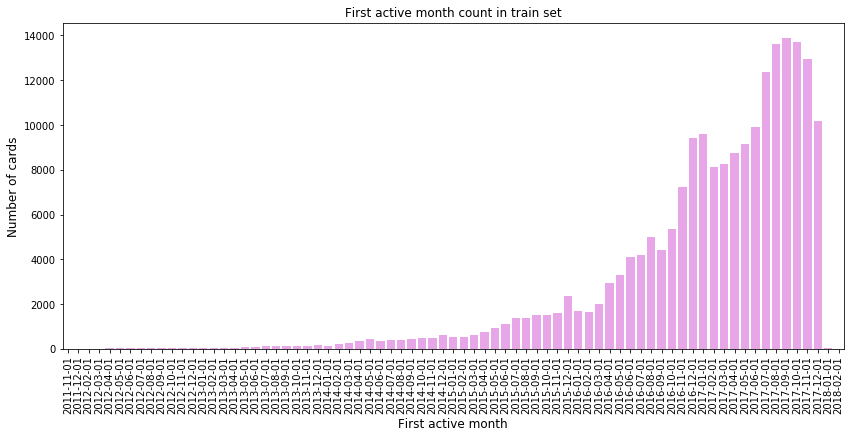

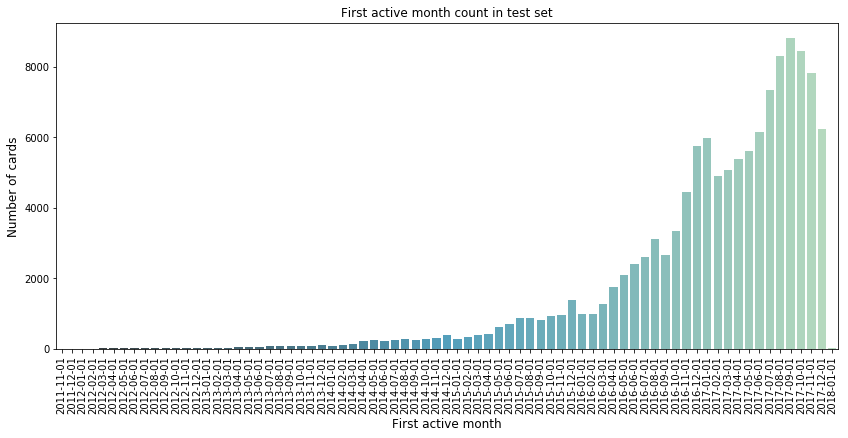

In [13]:
train['first_active_month']= pd.to_datetime(train['first_active_month'], errors='coerce')
cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='violet')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()
test['first_active_month']= pd.to_datetime(test['first_active_month'], errors='coerce')
cnt_srs = test['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values,palette="GnBu_d", alpha=1, color='pink')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()


# Using train set to find correlation between feature 1, feature 2, feature 3 ad target variable

In [37]:
train.corr()


,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


# Histograms plotting to understand the distribution of the target variable

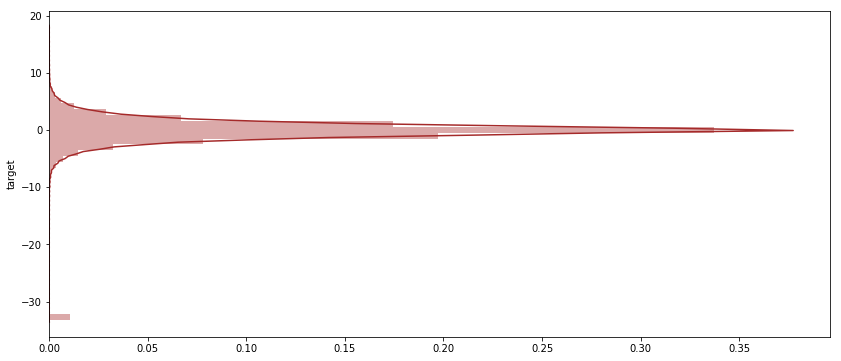

In [15]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(train['target'],vertical=True,color='brown')


In [62]:
train['target'].describe()


count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

# Using box and Violin plot visualize relationship between feature 1 and target 

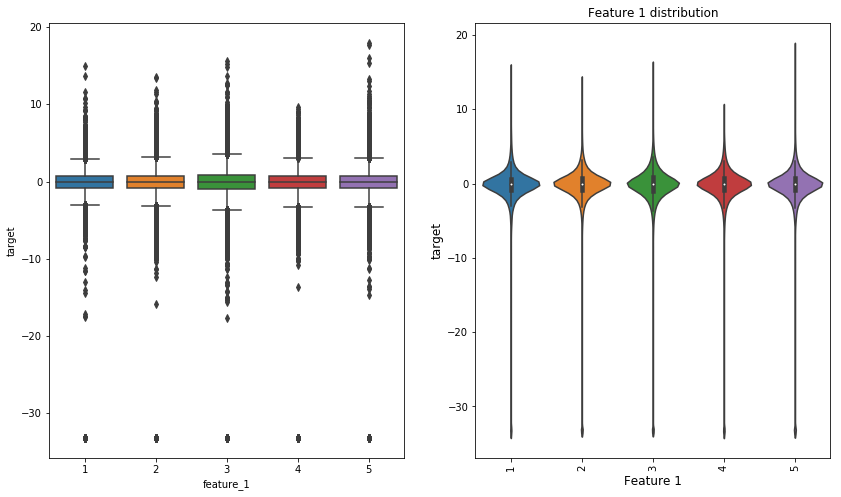

In [17]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_1']], axis=1)
fig = sns.boxplot(x='feature_1', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_1", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()


# Using box and Violin plot visualize relationship between feature 2 and target

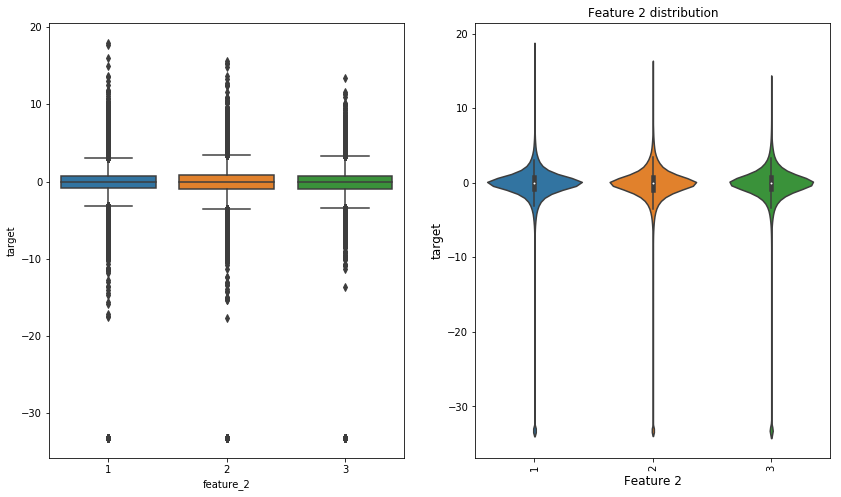

In [18]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_2']], axis=1)
fig = sns.boxplot(x='feature_2', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_2", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()


# Using box and Violin plot visualize relationship between feature 3 and target 

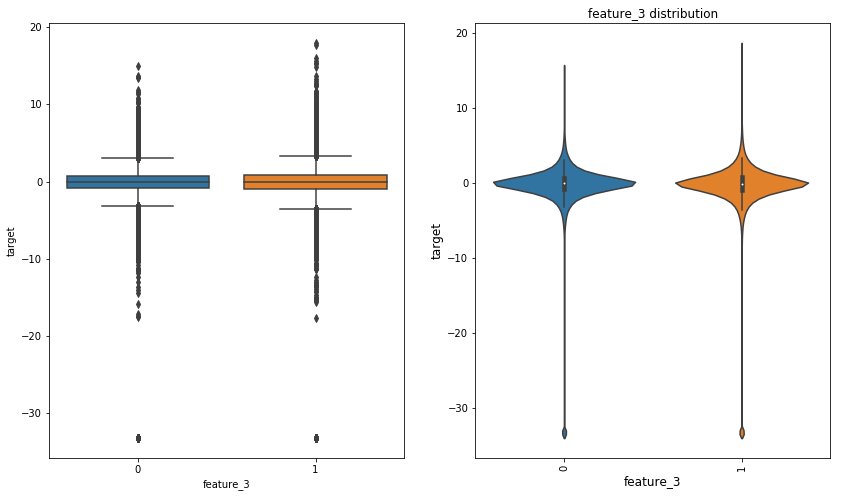

In [19]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_3']], axis=1)
fig = sns.boxplot(x='feature_3', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_3", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('feature_3', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("feature_3 distribution")
plt.show()


#  Plotting feature 1 and feature 3 using boxplot

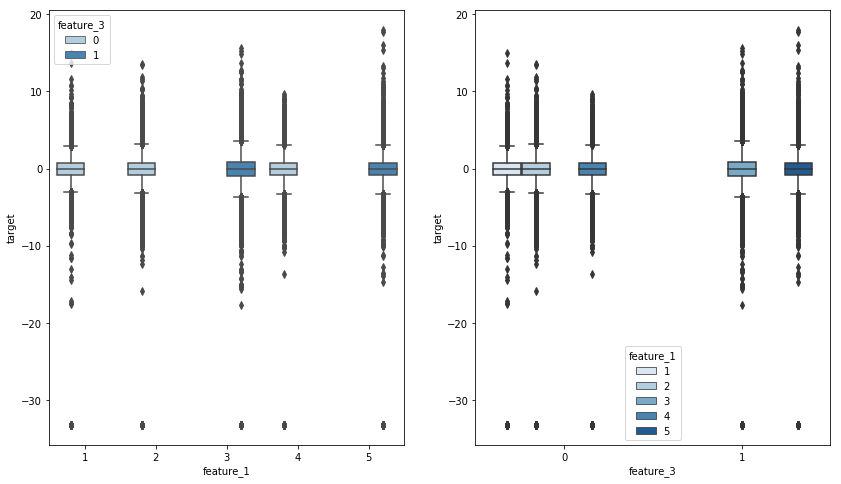

In [20]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_3",
               data=train, palette="Blues",ax=ax1)

sns.boxplot(x="feature_3", y="target", hue="feature_1",
               data=train, palette="Blues",ax=ax2)


# Plotting feature 1 and feature 2 with respect to target and each other

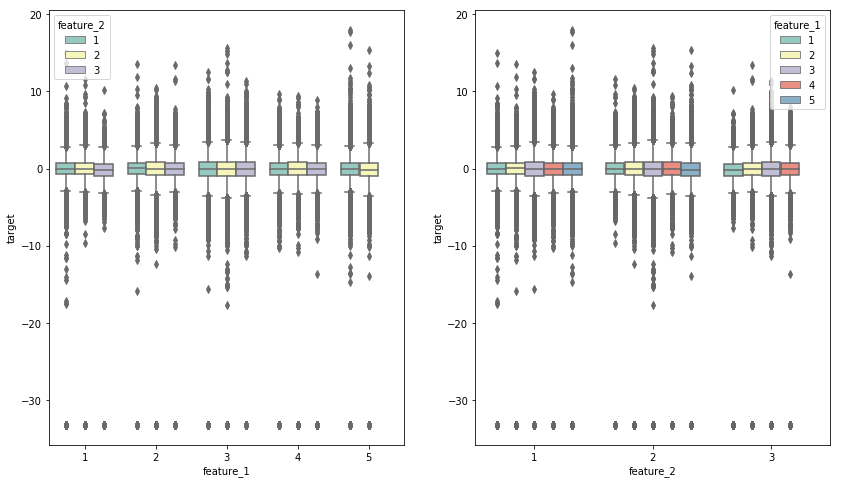

In [21]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_2",
               data=train, palette="Set3",ax=ax1)

sns.boxplot(x="feature_2", y="target", hue="feature_1",
               data=train, palette="Set3",ax=ax2)


In [63]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
target,0,0.0
feature_3,0,0.0
feature_2,0,0.0
feature_1,0,0.0
card_id,0,0.0
first_active_month,0,0.0


In [64]:
# checking missing data
total = test.isnull().sum().sort_values(ascending = False)
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
first_active_month,1,0.000809
feature_3,0,0.000000
feature_2,0,0.000000
feature_1,0,0.000000
card_id,0,0.000000


In [65]:
import datetime

for df in [train,test]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year'] = df['first_active_month'].dt.year
    df['month'] = df['first_active_month'].dt.month
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days

target = train['target']
del train['target']


In [66]:
train.head() # Looking at how the data looks like


,first_active_month,card_id,feature_1,feature_2,feature_3,year,month,elapsed_time
0,2017-06-01,C_ID_92a2005557,5,2,1,2017,6,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,2017,1,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,2016,8,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,2017,9,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,2017,11,92


# Simple Exploration : historical_transactions¶


In [67]:

ht = pd.read_csv("historical_transactions.csv")#historical transactions
print("shape of historical_transactions : ",ht.shape)


shape of historical_transactions :  (29112361, 14)


In [68]:
h=ht
hist=ht #to be able to retrieve the data
ht.head()


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


# Customer Transaction Approval for a particular category

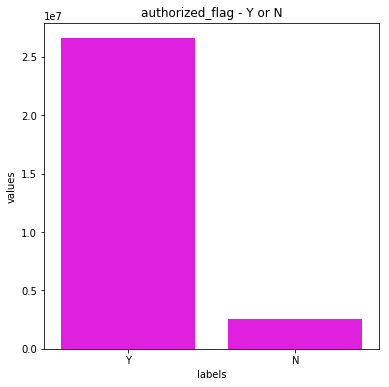

In [28]:
#Does customer approve transaction ? For this category?
temp = ht["authorized_flag"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('authorized_flag - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df, color="magenta")
locs, labels = plt.xticks()
plt.show()

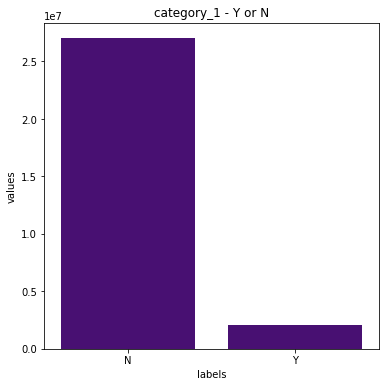

In [30]:
temp = ht["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df, color="indigo")
locs, labels = plt.xticks()
plt.show()


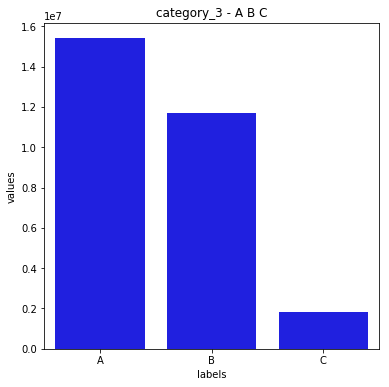

In [31]:
temp = ht["category_3"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_3 - A B C')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values",color= 'blue', data=df)
locs, labels = plt.xticks()
plt.show()


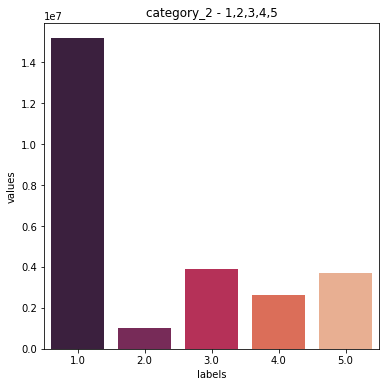

In [33]:
temp = ht["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 - 1,2,3,4,5')
sns.barplot(x = 'labels', y="values",palette="rocket", data=df)
locs, labels = plt.xticks()
plt.show()


# Data Visualization Using Histogram

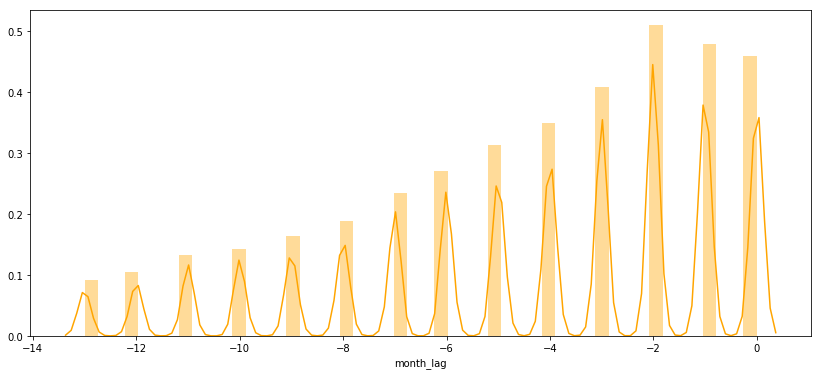

In [34]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['month_lag'], color="orange")


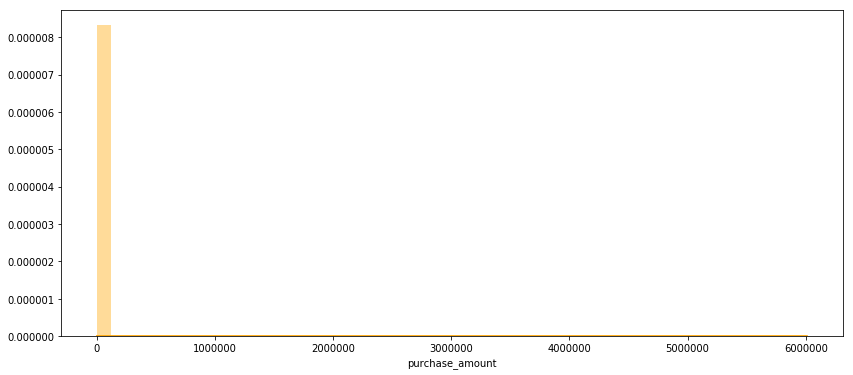

In [37]:
#histogram#
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['purchase_amount'], color="orange")


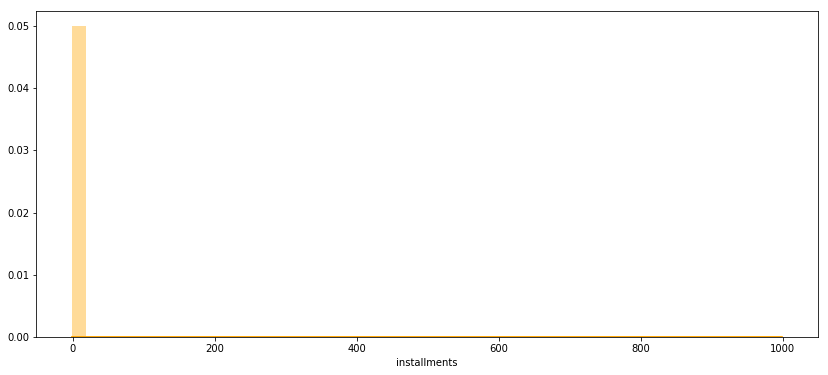

In [38]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['installments'], color="orange")


# Bar plots using different city_id

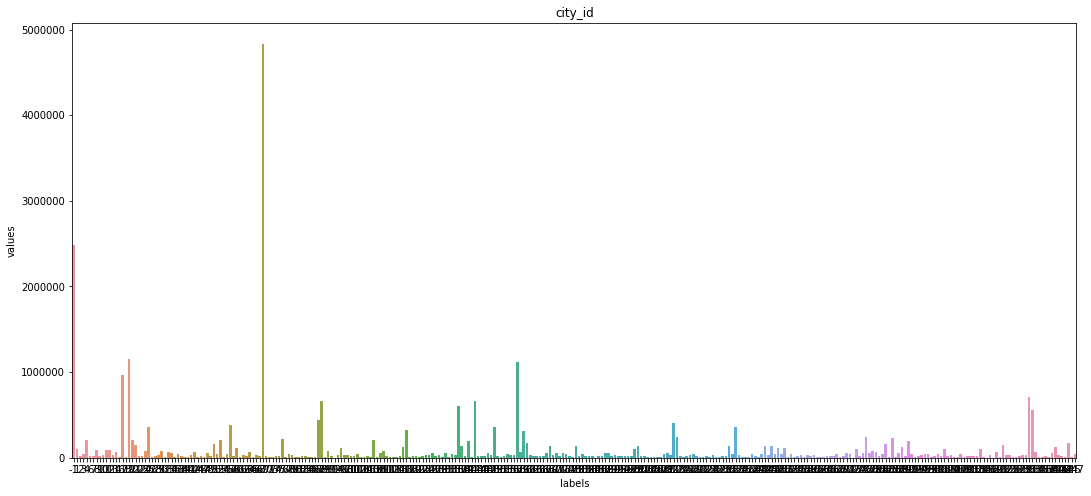

In [42]:
temp = ht["city_id"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (18,8))
plt.title('city_id')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values",  data=df)
locs, labels = plt.xticks()
plt.show()

# Mapping the categorical variable 

In [69]:
ht['authorized_flag'] = ht['authorized_flag'].map({'Y':1, 'N':0})


# Aggregating historical transactions 

In [70]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max']
        }
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

history = aggregate_historical_transactions(ht)
del ht
gc.collect()
#To stop memory wastage 


315

In [71]:
#This traces history of transactions of every card
history.head()

,card_id,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,hist_city_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max
0,C_ID_00007093c1,149,114,0.765101,29,4,-76.845041,-0.587627,1.507069,-0.728876,0.298141,192,1.0,6,1,0.764900,32627654.0,-12,0
1,C_ID_0001238066,123,120,0.975610,65,18,-72.447201,-0.648184,0.768095,-0.734887,0.190235,198,1.0,10,-1,1.485637,13110825.0,-5,0
2,C_ID_0001506ef0,66,62,0.939394,28,3,-34.601879,-0.703707,1.493545,-0.740491,0.472284,1,0.0,1,0,0.123091,34460275.0,-13,0
3,C_ID_0001793786,216,189,0.875000,119,10,-36.786013,-0.487911,4.554145,-0.745405,0.836046,5,0.0,1,0,0.150723,24487497.0,-9,0
4,C_ID_000183fdda,144,137,0.951389,73,9,-68.837938,-0.661294,2.764788,-0.737892,0.524948,264,1.0,10,-1,2.118846,17492874.0,-6,0


In [72]:
train = pd.merge(train, history, on='card_id', how='left')
test = pd.merge(test, history, on='card_id', how='left')
#Extract historic data of a specific customer

# Data Exploration of the merchants Dataset

In [50]:
merchant = pd.read_csv("merchants.csv") # Reading the merchants csv file
merchant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

In [51]:
merchant.head()


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [52]:
# checking missing data
total = merchant.isnull().sum().sort_values(ascending = False)
percent = (merchant.isnull().sum()/merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
category_2,11887,3.551581
avg_sales_lag3,13,0.003884
avg_sales_lag12,13,0.003884
avg_sales_lag6,13,0.003884
merchant_group_id,0,0.000000
merchant_category_id,0,0.000000
subsector_id,0,0.000000
numerical_1,0,0.000000
numerical_2,0,0.000000
category_1,0,0.000000


# Plotting Histograms for the merchants dataset

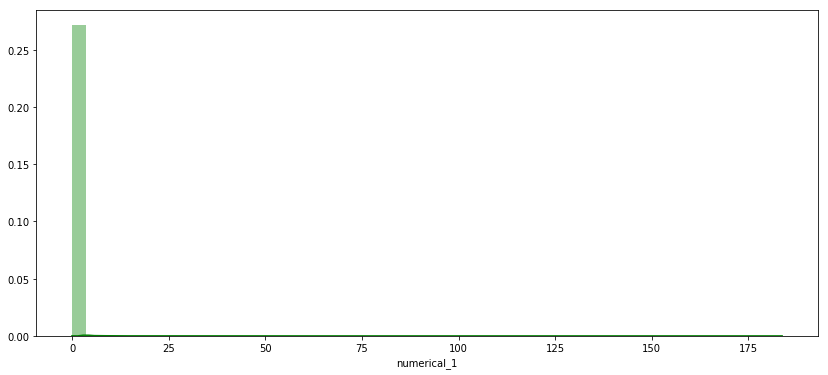

In [53]:
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(merchant['numerical_1'],color='green')


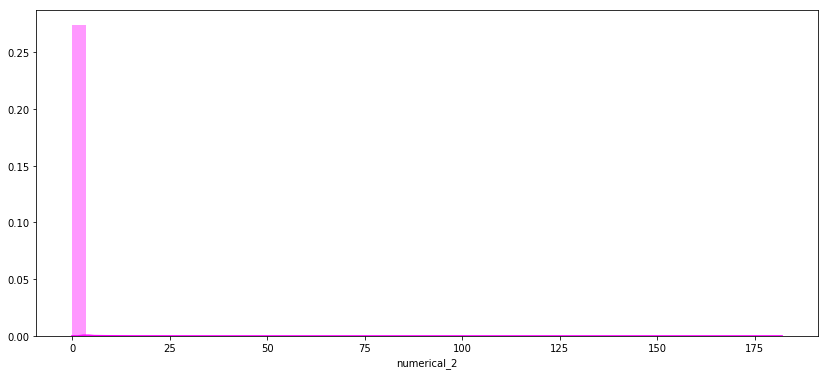

In [54]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(merchant['numerical_2'], color='magenta')


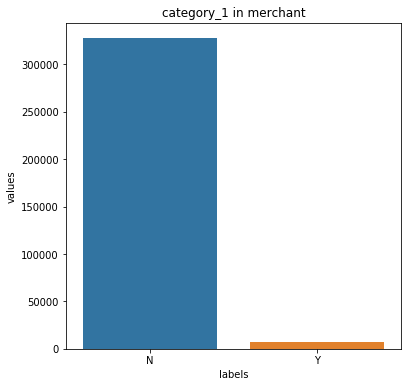

In [42]:
temp = merchant["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('category_1 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


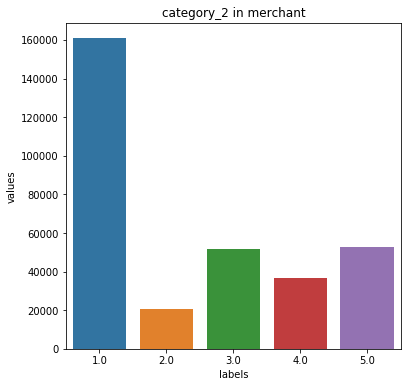

In [55]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


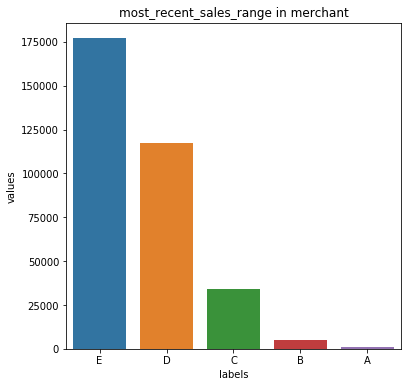

In [56]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["most_recent_sales_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_sales_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


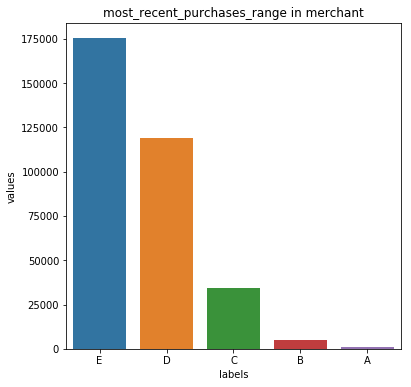

In [57]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["most_recent_purchases_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_purchases_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


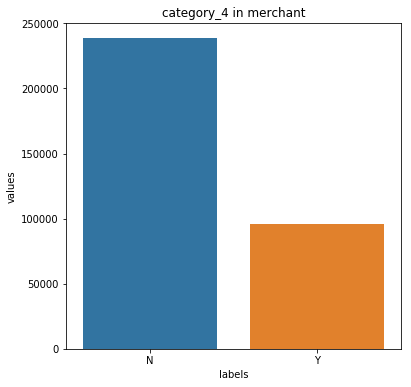

In [58]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["category_4"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_4 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


# Data Exploration of New Customers

In [73]:
new_merchant = pd.read_csv("new_merchant_transactions.csv")
print("shape of new_merchant_transactions : ",new_merchant.shape)


shape of new_merchant_transactions :  (1963031, 14)


In [74]:
new_merchant.head()


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [75]:
# checking missing data
total = new_merchant.isnull().sum().sort_values(ascending = False)
percent = (new_merchant.isnull().sum()/new_merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
category_2,111745,5.692473
category_3,55922,2.848758
merchant_id,26216,1.335486
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


# Mapping Categorical Variables

In [76]:
new_merchant['authorized_flag'] = new_merchant['authorized_flag'].map({'Y':1, 'N':0}) 


# Aggregating new transcations

In [77]:
def aggregate_new_transactions(new_trans):    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'month_lag': ['min', 'max']
        }
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    agg_new_trans.columns = ['new_' + '_'.join(col).strip() 
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
    
    df = (new_trans.groupby('card_id')
          .size()
          .reset_index(name='new_transactions_count'))
    
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
    
    return agg_new_trans

new_trans = aggregate_new_transactions(new_merchant)


In [78]:
new_trans.head()

,card_id,new_transactions_count,new_authorized_flag_sum,new_authorized_flag_mean,new_merchant_id_nunique,new_city_id_nunique,new_purchase_amount_sum,new_purchase_amount_median,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_median,new_installments_max,new_installments_min,new_installments_std,new_month_lag_min,new_month_lag_max
0,C_ID_00007093c1,2,2,1,2,2,-1.328524,-0.664262,-0.656749,-0.671775,0.010625,2,1.0,1,1,0.000000,2,2
1,C_ID_0001238066,26,26,1,25,8,-14.850055,-0.649235,-0.078318,-0.740897,0.173436,42,1.0,10,-1,2.079941,1,2
2,C_ID_0001506ef0,2,2,1,1,1,-1.447354,-0.723677,-0.715352,-0.732001,0.011773,0,0.0,0,0,0.000000,1,1
3,C_ID_0001793786,31,31,1,31,7,-0.229620,-0.372748,3.129932,-0.737892,0.947223,0,0.0,0,0,0.000000,1,2
4,C_ID_000183fdda,11,11,1,11,2,-6.590778,-0.665765,-0.107680,-0.732332,0.182877,16,1.0,4,-1,1.293340,1,2


In [79]:
train = pd.merge(train, new_trans, on='card_id', how='left') 
test = pd.merge(test, new_trans, on='card_id', how='left')


In [80]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,year,month,elapsed_time,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,hist_city_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max,new_transactions_count,new_authorized_flag_sum,new_authorized_flag_mean,new_merchant_id_nunique,new_city_id_nunique,new_purchase_amount_sum,new_purchase_amount_median,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_median,new_installments_max,new_installments_min,new_installments_std,new_month_lag_min,new_month_lag_max
0,2017-06-01,C_ID_92a2005557,5,2,1,2017,6,245,260,247,0.950000,94,7,-165.968739,-0.698042,2.258395,-0.739395,0.212139,4,0.0,1,0,0.123314,20977987.0,-8,0,23.0,23.0,1.0,23.0,3.0,-13.244202,-0.581180,-0.296112,-0.724368,0.135812,0.0,0.0,0.0,0.0,0.000000,1.0,2.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,2017,1,396,350,339,0.968571,142,9,-210.006336,-0.708590,4.630299,-0.742400,0.384967,543,1.0,10,-1,1.510777,33717687.0,-12,0,6.0,6.0,1.0,6.0,1.0,-4.355735,-0.732633,-0.701858,-0.739410,0.014326,6.0,1.0,1.0,1.0,0.000000,1.0,2.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,2016,8,549,43,41,0.953488,13,5,-29.167391,-0.698868,-0.145847,-0.730138,0.087380,0,0.0,0,0,0.000000,35635623.0,-13,0,1.0,1.0,1.0,1.0,1.0,-0.700326,-0.700326,-0.700326,-0.700326,NaN,0.0,0.0,0.0,0.0,NaN,2.0,2.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,2017,9,153,77,77,1.000000,50,7,-49.491364,-0.707989,1.445596,-0.740897,0.261624,84,1.0,3,-1,0.588974,13375339.0,-5,0,7.0,7.0,1.0,7.0,2.0,-4.654372,-0.691610,-0.566740,-0.734135,0.065882,5.0,1.0,1.0,-1.0,0.755929,1.0,2.0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,2017,11,92,133,128,0.962406,66,6,-48.687656,-0.689807,7.193041,-0.746156,1.352094,182,1.0,12,1,1.896862,9405641.0,-3,0,36.0,36.0,1.0,36.0,5.0,-19.926237,-0.607447,0.450886,-0.739395,0.223821,35.0,1.0,2.0,-1.0,0.376913,1.0,2.0


In [81]:
use_cols = [col for col in train.columns if col not in ['card_id', 'first_active_month']]
train = train[use_cols]
test = test[use_cols]
features = list(train[use_cols].columns)
categorical_features = [col for col in features if 'feature_' in col]
#Make all categorical data numerical.

In [82]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_features:
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))
#Run Cookie-cutter for labelencoder for all categorical predictor columns

In [84]:
df_all = pd.concat([train, test])
df_all = pd.get_dummies(df_all, columns=categorical_features)

len_train = train.shape[0]

train = df_all[:len_train]
test = df_all[len_train:]


In [85]:
print(train.head())
print(test.head())

     year  month  elapsed_time  hist_transactions_count  \
0  2017.0    6.0         245.0                      260   
1  2017.0    1.0         396.0                      350   
2  2016.0    8.0         549.0                       43   
3  2017.0    9.0         153.0                       77   
4  2017.0   11.0          92.0                      133   

   hist_authorized_flag_sum  hist_authorized_flag_mean  \
0                       247                   0.950000   
1                       339                   0.968571   
2                        41                   0.953488   
3                        77                   1.000000   
4                       128                   0.962406   

   hist_merchant_id_nunique  hist_city_id_nunique  hist_purchase_amount_sum  \
0                        94                     7               -165.968739   
1                       142                     9               -210.006336   
2                        13                     5          

4            1  


# Data Analysis Using h2o

# Creating test and train dataframes

In [75]:
trainhf = h2o.H2OFrame(train)
testhf = h2o.H2OFrame(test)
#Get Train dataset and test dataset in h20 dataframes.

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [78]:
result = pd.concat([train, target], axis=1, join_axes=[train.index])
#prepare train dataset for autoML in h20

In [69]:
result.head()

,year,month,elapsed_time,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,hist_city_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max,new_transactions_count,new_authorized_flag_sum,new_authorized_flag_mean,new_merchant_id_nunique,new_city_id_nunique,new_purchase_amount_sum,new_purchase_amount_median,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_median,new_installments_max,new_installments_min,new_installments_std,new_month_lag_min,new_month_lag_max,feature_1_0,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_2_0,feature_2_1,feature_2_2,feature_3_0,feature_3_1,target
0,2017.0,6.0,245.0,260,247,0.950000,94,7,-165.968739,-0.698042,2.258395,-0.739395,0.212139,4,0.0,1,0,0.123314,20977987.0,-8,0,23.0,23.0,1.0,23.0,3.0,-13.244202,-0.581180,-0.296112,-0.724368,0.135812,0.0,0.0,0.0,0.0,0.000000,1.0,2.0,0,0,0,0,1,0,1,0,0,1,-0.820283
1,2017.0,1.0,396.0,350,339,0.968571,142,9,-210.006336,-0.708590,4.630299,-0.742400,0.384967,543,1.0,10,-1,1.510777,33717687.0,-12,0,6.0,6.0,1.0,6.0,1.0,-4.355735,-0.732633,-0.701858,-0.739410,0.014326,6.0,1.0,1.0,1.0,0.000000,1.0,2.0,0,0,0,1,0,1,0,0,1,0,0.392913
2,2016.0,8.0,549.0,43,41,0.953488,13,5,-29.167391,-0.698868,-0.145847,-0.730138,0.087380,0,0.0,0,0,0.000000,35635623.0,-13,0,1.0,1.0,1.0,1.0,1.0,-0.700326,-0.700326,-0.700326,-0.700326,NaN,0.0,0.0,0.0,0.0,NaN,2.0,2.0,0,1,0,0,0,0,1,0,1,0,0.688056
3,2017.0,9.0,153.0,77,77,1.000000,50,7,-49.491364,-0.707989,1.445596,-0.740897,0.261624,84,1.0,3,-1,0.588974,13375339.0,-5,0,7.0,7.0,1.0,7.0,2.0,-4.654372,-0.691610,-0.566740,-0.734135,0.065882,5.0,1.0,1.0,-1.0,0.755929,1.0,2.0,0,0,0,1,0,0,0,1,1,0,0.142495
4,2017.0,11.0,92.0,133,128,0.962406,66,6,-48.687656,-0.689807,7.193041,-0.746156,1.352094,182,1.0,12,1,1.896862,9405641.0,-3,0,36.0,36.0,1.0,36.0,5.0,-19.926237,-0.607447,0.450886,-0.739395,0.223821,35.0,1.0,2.0,-1.0,0.376913,1.0,2.0,1,0,0,0,0,0,0,1,1,0,-0.159749


In [79]:
resulthf = h2o.H2OFrame(result)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [80]:
resulthf.describe() # Looking into how the data set is distributed 

Rows:201917
Cols:49




,year,month,elapsed_time,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,hist_city_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max,new_transactions_count,new_authorized_flag_sum,new_authorized_flag_mean,new_merchant_id_nunique,new_city_id_nunique,new_purchase_amount_sum,new_purchase_amount_median,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_median,new_installments_max,new_installments_min,new_installments_std,new_month_lag_min,new_month_lag_max,feature_1_0,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_2_0,feature_2_1,feature_2_2,feature_3_0,feature_3_1,target
type,int,int,int,int,int,real,int,int,real,real,real,real,real,int,real,int,int,real,int,int,int,int,int,int,int,int,real,real,real,real,real,int,real,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,real
mins,2011.0,1.0,0.0,2.0,2.0,0.03048780487804878,1.0,1.0,-2088.0125263300793,-0.74689277,-0.74531499,-0.7469078,0.0,-9.0,-1.0,0.0,-1.0,0.0,152065.0,-13.0,-11.0,1.0,1.0,1.0,0.0,1.0,-70.81348874000001,-0.74689277,-0.74689277,-0.74689277,0.0,-6.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.21928095
mean,2016.5092983750749,7.378744731746215,381.9789814626802,89.29416047187713,81.55898215603433,0.8933534742625053,33.67957130900326,4.901627896610983,14.425674130460056,-0.6246353656277084,66.67166002565287,-0.7299929271800293,12.653665461579756,57.854048940901485,0.6260319834387393,4.253163428537464,0.05599330417944013,0.7958600276516435,21098360.77233715,-7.877776512131219,-0.1660583308983394,6.776554843154475,6.776554843154475,1.0,6.68335314968942,2.3094296223039574,-3.741887008611667,-0.5817924620056562,-0.13169066018340317,-0.660581518438434,0.23155338109342613,4.626559843543384,0.6616764637249566,1.4797484248774924,0.3286366717411353,0.5197332072742253,1.1586790083673173,1.8153856411054186,0.05961360360940386,0.27633631640723666,0.36437248968635627,0.09848105904901519,0.20119653124798803,0.44197368225558026,0.37064239266629356,0.18738392507812615,0.4344309790656557,0.5655690209343444,-0.39363629907798764
maxs,2018.0,12.0,2284.0,2912.0,2537.0,1.0,398.0,67.0,6010596.056687671,29.3061158,6010603.9717525,28.55479021,1735112.1182583524,2413.0,12.0,999.0,10.0,276.34199361641987,36626924.0,-1.0,0.0,109.0,109.0,1.0,109.0,28.0,109.08620958,44.18236247,76.68290431,44.18236247,47.32774555470021,1004.0,12.0,999.0,12.0,185.47687838054935,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.9650684
sigma,0.7881987797584785,3.3407178705432297,293.7101762588666,104.60597962401933,99.24335719330448,0.11444551174244734,30.694613456920703,3.4962638044201944,13449.15789837491,0.2838218367185942,13448.549335754906,0.09189951929871792,3865.2394015035334,100.70877360623975,0.8158945632239231,22.9411582353378,0.723224614280829,3.0578917443732516,10219697.465676388,3.843313220560592,0.6369720519000303,6.694579468595416,6.694579468595416,0.0,6.650088979337292,1.670109402647818,4.395308968885091,0.5099587260290795,1.5321300562826763,0.43340949283818775,0.5922969385502688,8.195394052141918,1.0625806685951862,3.359907420745747,1.0369219111610508,1.0946252291350524,0.3653775066958175,0.38798548135534544,0.23677014067113566,0.44718625540887563,0.4812549485287373,0.2979647290502188,0.40089560114689593,0.49662276217682494,0.4829780167776804,0.39022037854501057,0.4956832863228728,0.4956832863228728,3.850499995486102
zeros,0,0,1,0,0,0,0,0,0,0,0,0,257,50983,96049,51020,98684,58062,0,0,181709,0,0,0,586,0,0,0,0,0,208,86531,87530,85222,86722,98757,0,0,189880,146120,128344,182032,161292,112675,127078,164081,114198,87719,1630
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21931,21931,21931,

# Setting up X and y

In [81]:
y = 'target'
X = [name for name in resulthf.columns if name != y]
print(y)
print(X)


target
['year', 'month', 'elapsed_time', 'hist_transactions_count', 'hist_authorized_flag_sum', 'hist_authorized_flag_mean', 'hist_merchant_id_nunique', 'hist_city_id_nunique', 'hist_purchase_amount_sum', 'hist_purchase_amount_median', 'hist_purchase_amount_max', 'hist_purchase_amount_min', 'hist_purchase_amount_std', 'hist_installments_sum', 'hist_installments_median', 'hist_installments_max', 'hist_installments_min', 'hist_installments_std', 'hist_purchase_date_ptp', 'hist_month_lag_min', 'hist_month_lag_max', 'new_transactions_count', 'new_authorized_flag_sum', 'new_authorized_flag_mean', 'new_merchant_id_nunique', 'new_city_id_nunique', 'new_purchase_amount_sum', 'new_purchase_amount_median', 'new_purchase_amount_max', 'new_purchase_amount_min', 'new_purchase_amount_std', 'new_installments_sum', 'new_installments_median', 'new_installments_max', 'new_installments_min', 'new_installments_std', 'new_month_lag_min', 'new_month_lag_max', 'feature_1_0', 'feature_1_1', 'feature_1_2', 'fe

In [83]:
# determine column types
ints, reals, enums = [], [], []
for key, val in resulthf.types.items():
    if key in X:
        if val == 'enum':
            enums.append(key)
        elif val == 'int':
            ints.append(key)            
        else: 
            reals.append(key)

print(ints)
print(enums)
print(reals)


['year', 'month', 'elapsed_time', 'hist_transactions_count', 'hist_authorized_flag_sum', 'hist_merchant_id_nunique', 'hist_city_id_nunique', 'hist_installments_sum', 'hist_installments_max', 'hist_installments_min', 'hist_purchase_date_ptp', 'hist_month_lag_min', 'hist_month_lag_max', 'new_transactions_count', 'new_authorized_flag_sum', 'new_authorized_flag_mean', 'new_merchant_id_nunique', 'new_city_id_nunique', 'new_installments_sum', 'new_installments_max', 'new_installments_min', 'new_month_lag_min', 'new_month_lag_max', 'feature_1_0', 'feature_1_1', 'feature_1_2', 'feature_1_3', 'feature_1_4', 'feature_2_0', 'feature_2_1', 'feature_2_2', 'feature_3_0', 'feature_3_1']
[]
['hist_authorized_flag_mean', 'hist_purchase_amount_sum', 'hist_purchase_amount_median', 'hist_purchase_amount_max', 'hist_purchase_amount_min', 'hist_purchase_amount_std', 'hist_installments_median', 'hist_installments_std', 'new_purchase_amount_sum', 'new_purchase_amount_median', 'new_purchase_amount_max', 'new_p

In [91]:
run_time=500
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="automl_test for credit card dataset"  # project_name = project

In [89]:
# impute missing values
_=resulthf[reals].impute(method='mean')
_=resulthf[ints].impute(method='median')

if scale:
    resulthf[reals] = resulthf[reals].scale()
    resulthf[ints] = resulthf[ints].scale()


# Balance classes for classification

In [93]:
if classification:
    class_percentage = y_balance=resulthf[y].mean()[0]/(resulthf[y].max()-resulthf[y].min())
    if class_percentage < balance_threshold:
        balance_y=True


In [94]:
print(run_time)
type(run_time)

500


int

In [97]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 500 seconds
aml.train(x=X,  
           y=y,
           training_frame=resulthf)


AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


# Leaderboard results predicting the best models and their rmse values

In [98]:
#View leaderboard
lb = aml.leaderboard
lb


model_id,mean_residual_deviance,rmse,mae,rmsle
StackedEnsemble_AllModels_0_AutoML_20181214_220313,14.2068,3.76918,1.58365,nan
StackedEnsemble_BestOfFamily_0_AutoML_20181214_220313,14.2068,3.76918,1.58365,nan
XRT_0_AutoML_20181214_220313,14.461,3.80277,1.6685,nan
DRF_0_AutoML_20181214_220313,14.4765,3.8048,1.67397,nan


# Output using Stacked Ensemble with rmse of 3.76918

In [99]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_0_AutoML_20181214_220313
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 5.867579391652967
RMSE: 2.4223086904135416
MAE: 1.1235602254441324
RMSLE: NaN
R^2: 0.6083716708076452
Mean Residual Deviance: 5.867579391652967
Null degrees of freedom: 161427
Residual degrees of freedom: 161425
Null deviance: 2418598.286771331
Residual deviance: 947191.6060357551
AIC: 743758.3312121301

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 13.425209768085088
RMSE: 3.6640428174470188
MAE: 1.5585101732437352
RMSLE: NaN
R^2: 0.05470572525443096
Mean Residual Deviance: 13.425209768085088
Null degrees of freedom: 40488
Residual degrees of freedom: 40486
Null deviance: 575091.0170361355
Residual deviance: 543573.3182999971
AIC: 220066.17381590017

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-

# Using LightGBM for predicting most important features

In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


lgb_params = {"objective" : "regression", "metric" : "rmse", 
               "max_depth": 11, "min_child_samples": 20, 
               "reg_alpha": 1, "reg_lambda": 1,
               "num_leaves" : 128, "learning_rate" : 0.005, 
               "subsample" : 0.8, "colsample_bytree" : 0.8, 
               "verbosity": -1}

FOLDs = KFold(n_splits=9, shuffle=True, random_state=1989) # Using K-fold Cross Validation

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))

features_lgb = list(train.columns)
feature_importance_df_lgb = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train)):
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx])

    print("LGB " + str(fold_) + "-" * 50)
    num_round = 10000
    clf = lgb.train(lgb_params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 50)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)

    fold_importance_df_lgb = pd.DataFrame()
    fold_importance_df_lgb["feature"] = features_lgb
    fold_importance_df_lgb["importance"] = clf.feature_importance()
    fold_importance_df_lgb["fold"] = fold_ + 1
    feature_importance_df_lgb = pd.concat([feature_importance_df_lgb, fold_importance_df_lgb], axis=0)
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / FOLDs.n_splits
    

print(np.sqrt(mean_squared_error(oof_lgb, target)))


LGB 0--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.37542	valid_1's rmse: 3.85572
Early stopping, best iteration is:
[1135]	training's rmse: 3.35385	valid_1's rmse: 3.85487
LGB 1--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.40392	valid_1's rmse: 3.61389
Early stopping, best iteration is:
[1372]	training's rmse: 3.35407	valid_1's rmse: 3.61169
LGB 2--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.38765	valid_1's rmse: 3.74961
Early stopping, best iteration is:
[1047]	training's rmse: 3.37988	valid_1's rmse: 3.74955
LGB 3--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.41007	valid_1's rmse: 3.57906
Early stopping, best iteration 

# Output: 
The LightGBM gives a better output than Stacked ensembles as it is able to reduce the RMSE significantly better with a value of 3.702757273647599

# Finding the most significant features using LightGBM

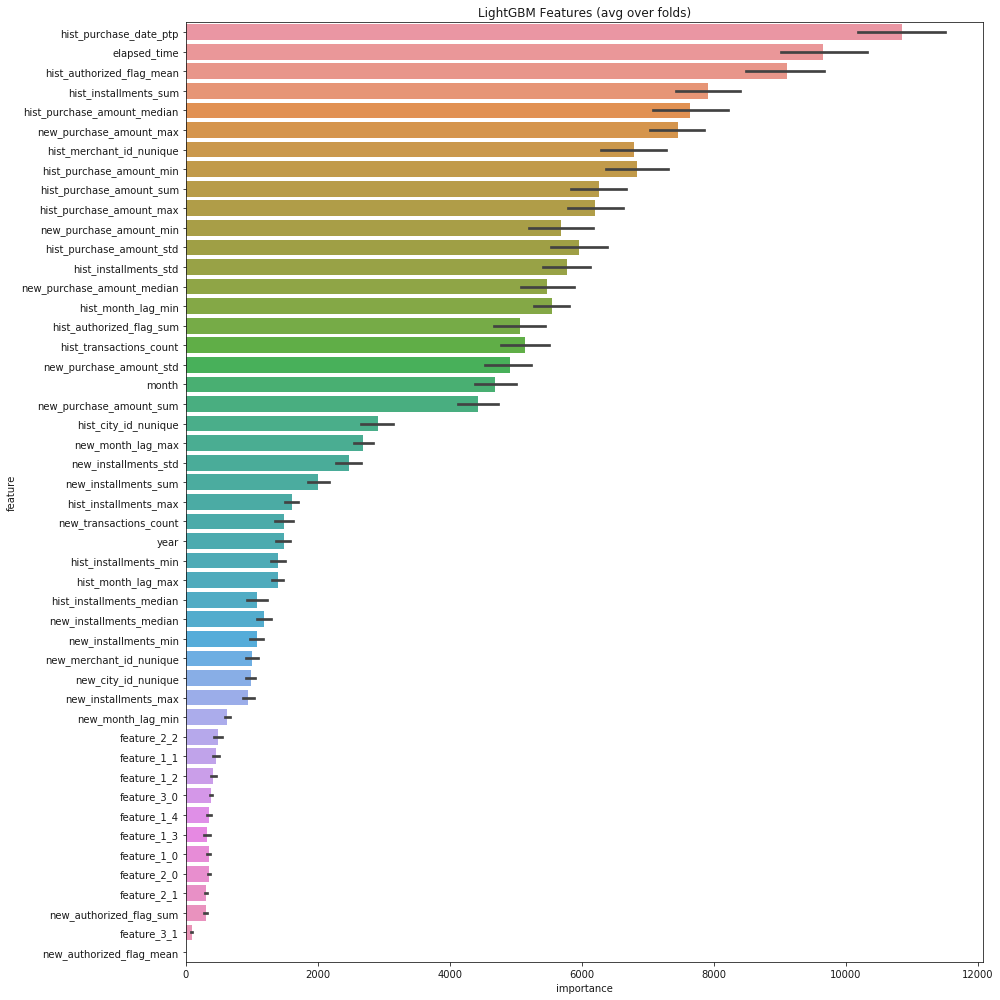

In [68]:
cols = (feature_importance_df_lgb[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df_lgb.loc[feature_importance_df_lgb.feature.isin(cols)]

plt.figure(figsize=(14,14))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')


In [ ]:
These are the most important features when predicting customer satisfaction.

# Using Collaborative Filtering Algorithm

In [2]:
import json
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.manifold import MDS
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer
from collections import OrderedDict
from scipy.cluster.hierarchy import fcluster,dendrogram, linkage, cophenet
from sklearn import mixture
from scipy.spatial.distance import pdist
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [3]:
ht = pd.read_csv("historical_transactions.csv")#historical transactions
ht.head()


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [6]:
#Predict on 
users = ht.filter([ 'card_id','category_1','category_2','category_3','city_id'],axis=1)
authorisation = ht.filter([ 'card_id','merchant_id','authorized_flag','purchase_date'],axis=1)
merchants = ht.filter([ 'merchant_id','merchant_category_id','purchase_amount'],axis=1)
rcols=ht.filter(['card_id','card_id','authorized_flag','purchase_date'],axis=1)


In [7]:
authorisation=authorisation.head(5000)

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(authorisation, test_size=0.2)


In [9]:
n_users = authorisation.card_id.unique().shape[0]
n_merchants = authorisation.merchant_id.unique().shape[0]



In [10]:
authorisation.card_id.head()

0    C_ID_4e6213e9bc
1    C_ID_4e6213e9bc
2    C_ID_4e6213e9bc
3    C_ID_4e6213e9bc
4    C_ID_4e6213e9bc
Name: card_id, dtype: object

In [11]:
authorisation.merchant_id.head()

0    M_ID_e020e9b302
1    M_ID_86ec983688
2    M_ID_979ed661fc
3    M_ID_e6d5ae8ea6
4    M_ID_e020e9b302
Name: merchant_id, dtype: object

# Checking for the missing values

In [12]:
authorisation.isnull().sum() 


card_id             0
merchant_id        29
authorized_flag     0
purchase_date       0
dtype: int64

# Dropping na's

In [13]:
authorisation=authorisation.dropna()
authorisation.isnull().sum()


card_id            0
merchant_id        0
authorized_flag    0
purchase_date      0
dtype: int64

# Using label encoding to convert categorical variables into numerical

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(authorisation.card_id.drop_duplicates()) 
authorisation.card_id = le.transform(authorisation.card_id)
le.fit(authorisation.merchant_id.drop_duplicates())
authorisation.merchant_id= le.fit_transform(authorisation.merchant_id)



In [15]:
le.fit(authorisation.authorized_flag.drop_duplicates())
authorisation.authorized_flag= le.fit_transform(authorisation.authorized_flag)


In [16]:
authorisation = authorisation.filter([ 'card_id','merchant_id','authorized_flag'],axis=1)
authorisation.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4971 entries, 0 to 4999
Data columns (total 3 columns):
card_id            4971 non-null int32
merchant_id        4971 non-null int32
authorized_flag    4971 non-null int32
dtypes: int32(3)
memory usage: 97.1 KB


In [17]:
n_users = authorisation.card_id.unique().shape[0]
n_merchants = authorisation.merchant_id.unique().shape[0]
print(n_users)
print(n_merchants)

19
1387


# Creating Data Matrix

In [18]:
data_matrix = np.zeros((n_users, n_merchants))
data_matrix.dtype

dtype('float64')

# Using cosine similarity

In [19]:
for line in authorisation.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

In [20]:
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(data_matrix, metric='cosine')
merchant_similarity = pairwise_distances(data_matrix.T, metric='cosine')


In [21]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [22]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, merchant_similarity, type='item')


In [23]:
user_prediction#User based prediction result

array([[ 0.10644122,  0.05144423, -0.00423932, ...,  0.05153985,
         0.05144423,  0.05132121],
       [ 0.09991756,  0.04252792,  0.04373927, ...,  0.04344716,
         0.04252792,  0.04296066],
       [ 0.14064382,  0.02999006,  0.08621271, ...,  0.08600647,
         0.02999006,  0.0844721 ],
       ...,
       [ 0.0719629 ,  0.01714705,  0.01682862, ...,  0.01636724,
         0.01714705,  0.01693087],
       [ 0.11518405,  0.05999253,  0.05982393, ...,  0.05957965,
         0.05999253,  0.05987807],
       [ 0.15955   ,  0.10539002,  0.10616219, ...,  0.10597599,
         0.10539002,  0.10566587]])

In [24]:
item_prediction#Item based prediction result

array([[0.05180575, 0.05386194, 0.00057438, ..., 0.05582374, 0.05386194,
        0.05249978],
       [0.0435056 , 0.04429936, 0.04379688, ..., 0.04642417, 0.04429936,
        0.04371895],
       [0.08543915, 0.00278107, 0.0862611 , ..., 0.09189021, 0.00278107,
        0.08580671],
       ...,
       [0.01709604, 0.01782732, 0.01725675, ..., 0.01807069, 0.01782732,
        0.01737647],
       [0.0601059 , 0.06247891, 0.06047925, ..., 0.06418048, 0.06247891,
        0.06089883],
       [0.10444159, 0.10869048, 0.10597662, ..., 0.11306224, 0.10869048,
        0.10648163]])

These predictions can be used to implement more robust and more complicated algorithms in recommender system which are initiation of further analysis in the rich domain of machine learning.

# Sources and References

In [ ]:
References
https://www.h2o.ai/
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
https://dataninjago.com/2017/08/04/iot-ml-tuning-hyper-parameters-using-grid-search/